In [2]:
import numpy as np
import matplotlib.pyplot as plt

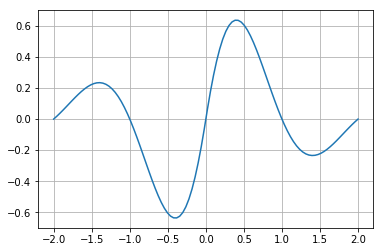

In [3]:
x = np.linspace(-2, 2, 100)
y = np.exp((-np.abs(x))) * np.sin(np.pi * x)

plt.plot(x, y)
plt.grid(True)
plt.show()

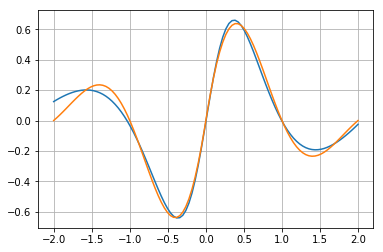

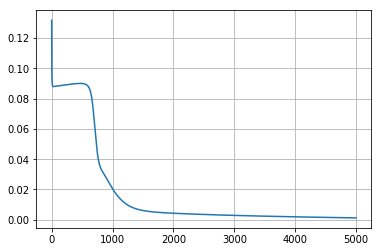

In [25]:
def network(S, lr):
    np.random.seed(42)
    W1 = np.random.uniform(-0.5, 0.5, size=(S,1))
    W2 = np.random.uniform(-0.5, 0.5, size=(S,1))
    b1 = np.random.uniform(-0.5, 0.5, size=(S,1))
    b2 = np.random.uniform(-0.5, 0.5, size=(1,1))
    
    epochs = 5000
    
    p = np.linspace(-2, 2, 100)
    t = np.exp((-np.abs(p))) * np.sin(np.pi * p)
    
    all_errors = []

    for i in range(epochs):
        error_squared = []
        for j in range(len(p)):
            n1 = (W1*p[j]) + b1
            a1 = 1 / (1 + np.exp(-n1))
            n2 = np.matmul(W2.T, a1) + b2
            a2 = n2
            e = t[j] - a2
            e_square = float(e) * float(e)
            error_squared.append(e_square)
            s2 = -2 * 1 * e
            #s1 = ((1 / (1 + np.exp(-n1))) * (1 - ((1 / (1 + np.exp(-n1)))))) 
            der = ((1-a1)*a1)
            flat_list = [a for i in der for a in i]
            f1der = np.diag(flat_list)
            s1 = np.matmul(f1der, W2) * s2
            W2 = W2 - lr*s2*a1 
            W1 = W1 - lr*p[j]* s1
            b2 = b2 - lr*s2
            b1 = b1 - lr*s1
        mse = np.mean(error_squared)
        all_errors.append(mse)

    
    output = []
    for j in range(len(p)):
        n1 = (W1*p[j]) + b1
        a1 = 1 / (1 + np.exp(-n1))
        n2 = np.matmul(W2.T, a1) + b2
        a2 = n2
        output.append(a2)
        
    output_list = [float(i) for a2 in output for i in a2]
    
    plt.plot(p, output_list)
    plt.plot(x, y)
    plt.grid(True)
    plt.show()
        
    epochs_list = list(range(epochs))
    plt.plot(epochs_list, all_errors)
    plt.grid(True)
    plt.show()
    
network(10, 0.01)
            
        

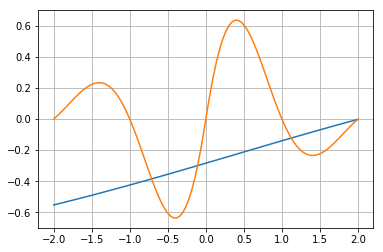

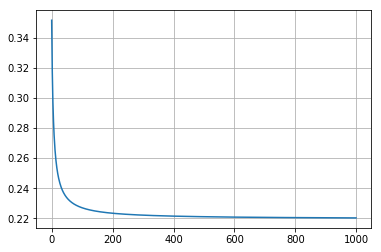

In [21]:
def network_batch(S, lr):
    np.random.seed(29)
    W1 = np.random.uniform(-0.5, 0.5, size=(S,1))
    W2 = np.random.uniform(-0.5, 0.5, size=(S,1))
    b1 = np.random.uniform(-0.5, 0.5, size=(S,1))
    b2 = np.random.uniform(-0.5, 0.5, size=(1,1))
    
    epochs = 1000
    
    p = np.linspace(-2, 2, 100)
    t = np.exp((-np.abs(p))) * np.sin(np.pi * p)
    
    all_errors = []

    for i in range(epochs):
        error_squared = []
        s1_list = []
        s2_list = []
        for j in range(len(p)):
            n1 = (W1*p[j]) + b1
            a1 = 1 / (1 + np.exp(-n1))
            n2 = np.matmul(W2.T, a1) + b2
            a2 = n2
            e = t[j] - a2
            e_square = float(e) * float(e)
            error_squared.append(e_square)
            s2 = -2 * 1 * e_square
            der = ((1-a1)*a1)
            flat_list = [a for i in der for a in i]
            f1der = np.diag(flat_list)
            s1 = np.matmul(f1der, W2) * s2
            s1_list.append(s1)
            s2_list.append(s2)
        
        s1_mat = []
        for i in range(len(s1_list[0])):
            s1_element_wise = [e[i] for e in s1_list]
            s1_flat_list = [a for b in s1_element_wise for a in b]
            s1_mean = np.mean(s1_flat_list)
            s1_mat.append(s1_mean)

        W2 = W2 - lr*s2*a1 
        W1 = W1 - lr*np.mean(p)*s1
        b2 = b2 - lr*s2
        b1 = b1 - lr*s1
        mse = np.mean(error_squared)
        all_errors.append(mse)

    
    output = []
    for j in range(len(p)):
        n1 = (W1*p[j]) + b1
        a1 = 1 / (1 + np.exp(-n1))
        n2 = np.matmul(W2.T, a1) + b2
        a2 = n2
        output.append(a2)
        
    output_list = [float(i) for a2 in output for i in a2]
    error_list = [err for err in all_errors]
    
    plt.plot(p, output_list)
    plt.plot(x, y)
    plt.grid(True)
    plt.show()
        
    epochs_list = list(range(epochs))
    plt.plot(epochs_list, error_list)
    plt.grid(True)
    plt.show()
    
network_batch(10, 0.1)
            
        

In [ ]:
#2 neurons does not create enough convergence to accurately estimate the function
#10 neurons with 4000+ epochs creates enough convergence that can almost exactly estimate the function
#Learning rate affects both the error and the convergence rate.
#Lr = 0.01 provides the best error reduction and convergence. 0.1 has an error that jumps up and down before going towards zero
#Lr = 0.001 doesn't allow for enough updating to convergence on the function
#Lr = 1 updates too much to converge on the function and errors jumps around
#Stochastic feed forward provides a smooth error drop and accurate convergence
#I found batch feed forward difficult for this because you have to calculate the update weight of the first layer with the 
#mean of the input and the mean of the input is here is 0 which means that weight matrix is never updated so the output is 
#linear and has no convergence on the function.